# Creation of single, clean dataframe

## Import and check of data

In [25]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Import of data around Corona rates in different countries

Taken from "Our World in Data" - data collective, looks fairly trustworthy and updated daily. Repo at https://github.com/owid/covid-19-data/tree/master/public/data

In [26]:
corona = pd.read_csv("owid-covid-data.csv")

In [27]:
corona

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85371,ZWE,Africa,Zimbabwe,2021-04-27,38164.0,62.0,41.286,1565.0,5.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85372,ZWE,Africa,Zimbabwe,2021-04-28,38191.0,27.0,30.143,1565.0,0.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85373,ZWE,Africa,Zimbabwe,2021-04-29,38235.0,44.0,31.000,1567.0,2.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85374,ZWE,Africa,Zimbabwe,2021-04-30,38257.0,22.0,30.286,1567.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [28]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85376 entries, 0 to 85375
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               85376 non-null  object 
 1   continent                              81256 non-null  object 
 2   location                               85376 non-null  object 
 3   date                                   85376 non-null  object 
 4   total_cases                            83271 non-null  float64
 5   new_cases                              83269 non-null  float64
 6   new_cases_smoothed                     82268 non-null  float64
 7   total_deaths                           73599 non-null  float64
 8   new_deaths                             73757 non-null  float64
 9   new_deaths_smoothed                    82268 non-null  float64
 10  total_cases_per_million                82821 non-null  float64
 11  ne

In [29]:
corona_subset = corona.iloc[:, [0,1,2,3,10,11,12,13,14,15,16,44,45]]

### Supplement data with Vax info

Taken from a seperate dataset from Our World in Data

In [30]:
vax = pd.read_csv("vaccinations.csv")

In [31]:
vax

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15871,Zimbabwe,ZWE,2021-04-26,411610.0,353834.0,57776.0,21592.0,13517.0,2.77,2.38,0.39,909.0
15872,Zimbabwe,ZWE,2021-04-27,433939.0,370676.0,63263.0,22329.0,15562.0,2.92,2.49,0.43,1047.0
15873,Zimbabwe,ZWE,2021-04-28,458013.0,388021.0,69992.0,24074.0,17860.0,3.08,2.61,0.47,1202.0
15874,Zimbabwe,ZWE,2021-04-29,477597.0,400771.0,76826.0,19584.0,17971.0,3.21,2.70,0.52,1209.0


In [32]:
vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15876 entries, 0 to 15875
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             15876 non-null  object 
 1   iso_code                             15876 non-null  object 
 2   date                                 15876 non-null  object 
 3   total_vaccinations                   9897 non-null   float64
 4   people_vaccinated                    9262 non-null   float64
 5   people_fully_vaccinated              6942 non-null   float64
 6   daily_vaccinations_raw               8454 non-null   float64
 7   daily_vaccinations                   15670 non-null  float64
 8   total_vaccinations_per_hundred       9897 non-null   float64
 9   people_vaccinated_per_hundred        9262 non-null   float64
 10  people_fully_vaccinated_per_hundred  6942 non-null   float64
 11  daily_vaccinations_per_milli

In [33]:
vax_supplement = vax.iloc[:, [1,2,8,9,10,11]]

In [34]:
corona_full = corona_subset.merge(vax_supplement, how="outer", on=["iso_code", "date"])

In [35]:
corona_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85847 entries, 0 to 85846
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             85847 non-null  object 
 1   continent                            81256 non-null  object 
 2   location                             85376 non-null  object 
 3   date                                 85847 non-null  object 
 4   total_cases_per_million              82821 non-null  float64
 5   new_cases_per_million                82819 non-null  float64
 6   new_cases_smoothed_per_million       81823 non-null  float64
 7   total_deaths_per_million             73162 non-null  float64
 8   new_deaths_per_million               73320 non-null  float64
 9   new_deaths_smoothed_per_million      81823 non-null  float64
 10  reproduction_rate                    68942 non-null  float64
 11  population                  

### Import listing of the major global stock indices

All financial data taken from Yahoo Finance as a source

In [36]:
exchanges = pd.read_csv("indices.csv")

In [37]:
exchanges.head()

,Rank,Year,Stock exchange,MIC,Region,Market place,Market cap,Monthly trade volume,Time zone,Δ,DST,Open,Close,Lunch,Open.1,Close.1
0,Rank,Year,Stock exchange,MIC,Region,Market place,(USD bn),(USD bn),Time zone,Δ,DST,(local time),(local time),(local time),"(UTC, winter only)","(UTC, winter only)"
1,1,2019,New York Stock Exchange,XNYS,United States,New York City,"22,923","1,452",EST/EDT,−5,Mar–Nov,09:30,16:00,No,14:30,21:00
2,2,2019,Nasdaq,XNAS,United States,New York City,"10,857","1,262",EST/EDT,−5,Mar–Nov,09:30,16:00,No,14:30,21:00
3,3,2019,Japan Exchange Group,XJPX,Japan,TokyoOsaka,"5,679",481,JST,+9,NaN,09:00,15:00,11:30–12:30,00:00,06:00
4,4,2019,London Stock Exchange,XLONXMIL,United Kingdom Italy,LondonMilan,"4,590",219,GMT/BST,+0,Mar–Oct,08:00,16:30,No,08:00,16:30


In [38]:
exchanges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  34 non-null     object
 1   Year                  34 non-null     object
 2   Stock exchange        34 non-null     object
 3   MIC                   34 non-null     object
 4   Region                34 non-null     object
 5   Market place          34 non-null     object
 6   Market cap            34 non-null     object
 7   Monthly trade volume  28 non-null     object
 8   Time zone             33 non-null     object
 9   Δ                     33 non-null     object
 10  DST                   18 non-null     object
 11  Open                  32 non-null     object
 12  Close                 32 non-null     object
 13  Lunch                 32 non-null     object
 14  Open.1                32 non-null     object
 15  Close.1               32 non-null     obje

In [39]:
exchanges_subset = exchanges.sort_values(by="Region", ignore_index=True).iloc[:, [2, 3, 4, 5]].drop(0)

In [40]:
exchanges_subset

,Stock exchange,MIC,Region,Market place
1,Australian Securities Exchange,XASX,Australia,Sydney
2,B3,BVMF,Brazil,São Paulo
3,Toronto Stock Exchange,XTSE,Canada,Toronto
4,Shanghai Stock Exchange,XSHG,China,Shanghai
5,Shenzhen Stock Exchange,XSHE,China,Shenzhen
6,Copenhagen Stock Exchange,XCSE,Denmark,Copenhagen
7,Tallinn Stock Exchange,XTAL,Estonia,Tallinn
8,Euronext,XAMSXBRUXMSMXLISXOSLXPAR,European Union,AmsterdamBrusselsDublinLisbonOsloParis
9,Helsinki Stock Exchange,XHEL,Finland,Helsinki
10,Deutsche Börse,XFRA,Germany,Frankfurt


### Supplement with index symbols

Also taken from Yahoo Finance, in this case from a webpage translated to .csv using online converter. Due to incinsistencies between lists, in the end I had to manually add the region for each index, making the exchange data unnecessary for now

In [41]:
symbols = pd.read_csv("index-symbols.csv")

In [42]:
symbols.head()

,"<span data-reactid=""19"">Symbol<!-- react-text: 20 --><!-- /react-text -->","<span data-reactid=""22"">Name<!-- react-text: 23 --><!-- /react-text -->","<span data-reactid=""25"">Last Price<!-- react-text: 26 --><!-- /react-text -->","<span data-reactid=""28"">Change<!-- react-text: 29 --><!-- /react-text -->","<span data-reactid=""31"">% Change<!-- react-text: 32 --><!-- /react-text -->","<span data-reactid=""34"">Volume<!-- react-text: 35 --><!-- /react-text -->","<span data-reactid=""37"">Intraday High/Low<!-- react-text: 38 --><!-- /react-text -->","<span data-reactid=""40"">52 Week Range<!-- react-text: 41 --><!-- /react-text -->","<span data-reactid=""43"">Day Chart<!-- react-text: 44 --><!-- /react-text -->"
0,^GSPC,S&P 500,"4,181.17",-30.30,-0.72%,2.421B,NaN,NaN,NaN
1,^DJI,Dow 30,"33,874.85",-185.51,-0.54%,376.106M,NaN,NaN,NaN
2,^IXIC,Nasdaq,"13,962.68",-119.86,-0.85%,4.422B,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),"16,219.33",-156.67,-0.96%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,"2,942.49",+33.92,+1.17%,0,NaN,NaN,NaN


In [43]:
symbols_subset = symbols.iloc[:, [0, 1]].copy()

In [44]:
symbols_subset["Region"] = ["United States", "United States", "United States", "United States", "United States", "United Kingdom", "United States", "United States", "United Kingdom", "Germany", "France", "Europe", "Europe", "Belgium", "Russia", "Japan", "Hong Kong", "China", "China", "Singapore", "Australia", "Australia", "India", "Malaysia", "Malaysia", "New Zealand", "South Korea", "Taiwan", "Canada", "Brazil", "Mexico", "Chile", "Argentina", "Israel", "Egypt", "South Africa"]

In [45]:
symbols_subset = symbols_subset.rename(columns = {'<span data-reactid="19">Symbol<!-- react-text: 20 --><!-- /react-text -->':"yahoo_index", '<span data-reactid="22">Name<!-- react-text: 23 --><!-- /react-text -->':"index_name"})
symbols_subset.head()

,yahoo_index,index_name,Region
0,^GSPC,S&P 500,United States
1,^DJI,Dow 30,United States
2,^IXIC,Nasdaq,United States
3,^NYA,NYSE COMPOSITE (DJ),United States
4,^XAX,NYSE AMEX COMPOSITE INDEX,United States


### Market data

With a ticker taken from the indices above, I can get live data from Yahoo Finance

In [46]:
ticker = symbols_subset.iloc[:, 0].tolist()

In [47]:
stocks = yf.download(ticker, start = "2020-01-01", end = "2021-04-30")

[*********************100%***********************]  36 of 36 completed

2 Failed downloads:
- ^CASE30: No data found for this date range, symbol may be delisted
- ^IPSA: No data found for this date range, symbol may be delisted


In [48]:
stocks

Adj Close                                                       \
              000001.SS     399001.SZ     IMOEX.ME        ^AORD        ^AXJO   
Date                                                                           
2019-12-31          NaN           NaN          NaN          NaN          NaN   
2020-01-02  3085.197998  10638.820312          NaN  6810.000000  6690.600098   
2020-01-03  3083.785889  10656.410156  3076.370117  6855.200195  6733.500000   
2020-01-06  3083.407959  10698.269531  3078.870117  6857.399902  6735.700195   
2020-01-07  3104.802002  10829.049805          NaN  6943.600098  6826.399902   
...                 ...           ...          ...          ...          ...   
2021-04-26  3441.169922  14224.450195  3610.979980  7307.799805  7045.600098   
2021-04-27  3442.610107  14264.080078  3600.600098  7295.500000  7033.799805   
2021-04-28  3457.070068  14398.379883  3578.120117  7320.000000  7064.700195   
2021-04-29  3474.899902  14464.080078  3571.050049  7346.000000  7082.299805   
2021-04-30          NaN           NaN          NaN          NaN          NaN   

                                                                     ...  \
                   ^BFX        ^BSESN    ^BUK100P     ^BVSP ^CASE30  ...   
Date                                                                 ...   
2019-12-31          NaN           NaN         NaN       NaN     NaN  ...   
2020-01-02  4015.929932  41626.640625  760.349976  118573.0     NaN  ...   
2020-01-03  3994.610107  41464.609375  760.780029  117707.0     NaN  ...   
2020-01-06  3971.780029  40676.628906  756.409973  116878.0     NaN  ...   
2020-01-07  3984.729980  40869.468750  756.809998  116662.0     NaN  ...   
...                 ...           ...         ...       ...     ...  ...   
2021-04-26  4053.699951  48386.511719  693.510010  120595.0     NaN  ...   
2021-04-27  4033.409912  48944.140625  689.739990  119388.0     NaN  ...   
2021-04-28  4044.070068  49733.839844  693.309998  121053.0     NaN  ...   
2021-04-29  4038.659912  49765.941406  692.969971  120066.0     NaN  ...   
2021-04-30          NaN           NaN         NaN       NaN     NaN  ...   

                Volume                                                       \
                 ^N225          ^NYA       ^NZ50          ^RUT         ^STI   
Date                                                                          
2019-12-31         NaN  2.893810e+09         NaN  2.893810e+09          NaN   
2020-01-02         NaN  3.458250e+09         NaN  3.458250e+09  136381900.0   
2020-01-03         NaN  3.461290e+09  10962200.0  3.461290e+09  193650300.0   
2020-01-06  72800000.0  3.674070e+09  19168200.0  3.674070e+09  154063200.0   
2020-01-07  64300000.0  3.420380e+09  15891000.0  3.420380e+09  187657600.0   
...                ...           ...         ...           ...          ...   
2021-04-26  49200000.0  3.738920e+09         NaN  3.738920e+09  241691100.0   
2021-04-27  59400000.0  3.703240e+09         0.0  3.703240e+09  217519600.0   
2021-04-28  61400000.0  3.772390e+09  32251800.0  3.772390e+09  199817500.0   
2021-04-29         NaN  4.288940e+09  22146200.0  4.288940e+09  189522200.0   
2021-04-30         NaN           NaN  42201300.0           NaN          NaN   

                                                           
             ^STOXX50E    ^TA125.TA       ^TWII ^VIX ^XAX  
Date                                                       
2019-12-31         NaN          NaN         NaN  0.0  0.0  
2020-01-02         NaN  145565900.0   2023800.0  0.0  0.0  
2020-01-03  30343400.0          NaN   2572900.0  0.0  0.0  
2020-01-06  28339400.0   62182300.0   2345200.0  0.0  0.0  
2020-01-07  29853300.0   66628600.0   2338400.0  0.0  0.0  
...                ...          ...         ...  ...  ...  
2021-04-26  25159000.0   70177400.0   9298000.0  0.0  0.0  
2021-04-27  27504300.0   69680600.0   9687900.0  0.0  0.0  
2021-04-28  28225100.0   55749300.0  10510700.0  0.0  0.0  
2

In [49]:
close = stocks.loc[:, "Close"].copy()
starter = close.iloc[1, :]
close = close / starter

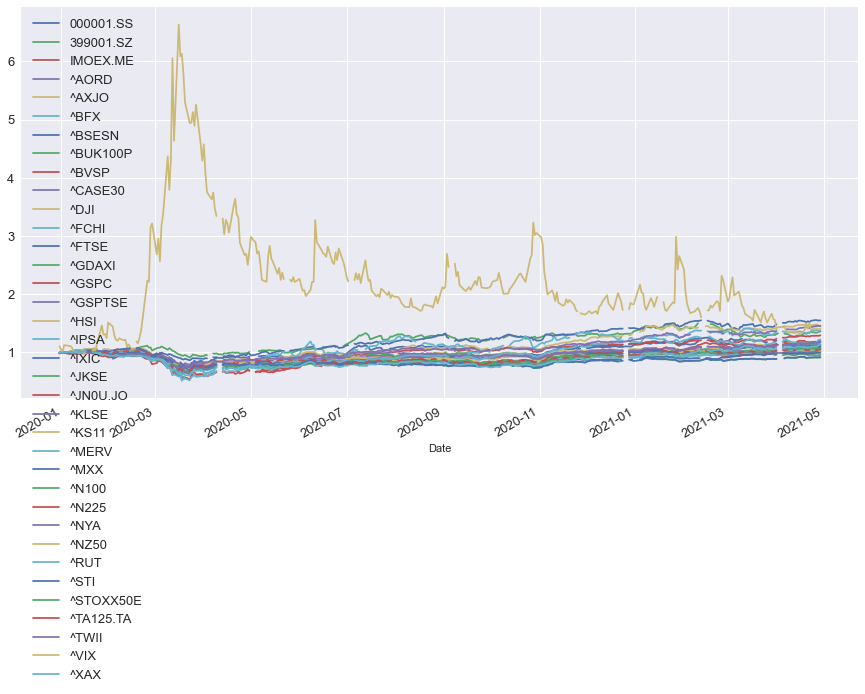

In [50]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
close.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Merging Covid and Market data

In [51]:
corona_full.head()

,iso_code,continent,location,date,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,population,population_density,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,AFG,Asia,Afghanistan,2020-02-24,0.026,0.026,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,0.026,0.000,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,0.026,0.000,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,0.026,0.000,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,0.026,0.000,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,NaN,NaN,NaN


In [52]:
symbols_subset.head()

,yahoo_index,index_name,Region
0,^GSPC,S&P 500,United States
1,^DJI,Dow 30,United States
2,^IXIC,Nasdaq,United States
3,^NYA,NYSE COMPOSITE (DJ),United States
4,^XAX,NYSE AMEX COMPOSITE INDEX,United States


In [53]:
full_dataset = corona_full.merge(symbols_subset, how="outer", left_on="location", right_on="Region")
full_dataset.head()

,iso_code,continent,location,date,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,population,population_density,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,yahoo_index,index_name,Region
0,AFG,Asia,Afghanistan,2020-02-24,0.026,0.026,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,0.026,0.000,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,0.026,0.000,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,0.026,0.000,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,0.026,0.000,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
data_mask = full_dataset["yahoo_index"].notna()

In [55]:
full_dataset = full_dataset[data_mask]
full_dataset

,iso_code,continent,location,date,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,population,population_density,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,yahoo_index,index_name,Region
3068,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,16.177,NaN,NaN,NaN,NaN,^MERV,MERVAL,Argentina
3069,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,16.177,NaN,NaN,NaN,NaN,^MERV,MERVAL,Argentina
3070,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,16.177,NaN,NaN,NaN,NaN,^MERV,MERVAL,Argentina
3071,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,16.177,NaN,NaN,NaN,NaN,^MERV,MERVAL,Argentina
3072,ARG,South America,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,16.177,NaN,NaN,NaN,NaN,^MERV,MERVAL,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,USA,North America,United States,2021-05-01,97861.072,136.866,149.831,1742.349,1.48,2.044,NaN,331002647.0,35.608,72.8,43.73,30.92,7613.0,^IXIC,Nasdaq,United States
86508,USA,North America,United States,2021-05-01,97861.072,136.866,149.831,1742.349,1.48,2.044,NaN,331002647.0,35.608,72.8,43.73,30.92,7613.0,^NYA,NYSE COMPOSITE (DJ),United States
86509,USA,North America,United States,2021-05-01,97861.072,136.866,149.831,1742.349,1.48,2.044,NaN,331002647.0,35.608,72.8,43.73,30.92,7613.0,^XAX,NYSE AMEX COMPOSITE INDEX,United States
86510,USA,North America,United States,2021-05-01,97861.072,136.866,149.831,1742.349,1.48,2.044,NaN,331002647.0,35.608,72.8,43.73,30.92,7613.0,^RUT,Russell 2000,United States


In [56]:
full_dataset.set_index(["location", "index_name"], inplace=True)

In [57]:
full_dataset.index.unique()

MultiIndex([(     'Argentina',                    'MERVAL'),
            (     'Australia',               'S&P/ASX 200'),
            (     'Australia',            'ALL ORDINARIES'),
            (       'Belgium',                    'BEL 20'),
            (        'Brazil',                  'IBOVESPA'),
            (        'Canada',   'S&P/TSX Composite index'),
            (         'Chile',              'S&P/CLX IPSA'),
            (         'China',       'SSE Composite Index'),
            (         'China',        'Shenzhen Component'),
            (         'Egypt', 'EGX 30 Price Return Index'),
            (        'Europe',            'ESTX 50 PR.EUR'),
            (        'Europe',              'EURONEXT 100'),
            (        'France',                    'CAC 40'),
            (       'Germany',     'DAX PERFORMANCE-INDEX'),
            (     'Hong Kong',           'HANG SENG INDEX'),
            (         'India',            'S&P BSE SENSEX'),
            (        'Is

In [78]:
stocks.head()

Adj Close                                          \
                       000001.SS     399001.SZ     IMOEX.ME        ^AORD   
Date                                                                       
2019-12-31 00:00:00          NaN           NaN          NaN          NaN   
2020-01-02 00:00:00  3085.197998  10638.820312          NaN  6810.000000   
2020-01-03 00:00:00  3083.785889  10656.410156  3076.370117  6855.200195   
2020-01-06 00:00:00  3083.407959  10698.269531  3078.870117  6857.399902   
2020-01-07 00:00:00  3104.802002  10829.049805          NaN  6943.600098   

                                                                         \
                           ^AXJO         ^BFX        ^BSESN    ^BUK100P   
Date                                                                      
2019-12-31 00:00:00          NaN          NaN           NaN         NaN   
2020-01-02 00:00:00  6690.600098  4015.929932  41626.640625  760.349976   
2020-01-03 00:00:00  6733.500000  3994.610107  41464.609375  760.780029   
2020-01-06 00:00:00  6735.700195  3971.780029  40676.628906  756.409973   
2020-01-07 00:00:00  6826.399902  3984.729980  40869.468750  756.809998   

                                       ...      Volume                \
                        ^BVSP ^CASE30  ...       ^N225          ^NYA   
Date                                   ...                             
2019-12-31 00:00:00       NaN     NaN  ...         NaN  2.893810e+09   
2020-01-02 00:00:00  118573.0     NaN  ...         NaN  3.458250e+09   
2020-01-03 00:00:00  117707.0     NaN  ...         NaN  3.461290e+09   
2020-01-06 00:00:00  116878.0     NaN  ...  72800000.0  3.674070e+09   
2020-01-07 00:00:00  116662.0     NaN  ...  64300000.0  3.420380e+09   

                                                                        \
                          ^NZ50          ^RUT         ^STI   ^STOXX50E   
Date                                                                     
2019-12-31 00:00:00         NaN  2.893810e+09          NaN         NaN   
2020-01-02 00:00:00         NaN  3.458250e+09  136381900.0         NaN   
2020-01-03 00:00:00  10962200.0  3.461290e+09  193650300.0  30343400.0   
2020-01-06 00:00:00  19168200.0  3.674070e+09  154063200.0  28339400.0   
2020-01-07 00:00:00  15891000.0  3.420380e+09  187657600.0  29853300.0   

                                                       
                       ^TA125.TA      ^TWII ^VIX ^XAX  
Date                                                   
2019-12-31 00:00:00          NaN        NaN  0.0  0.0  
2020-01-02 00:00:00  145565900.0  2023800.0  0.0  0.0  
2020-01-03 00:00:00          NaN  2572900.0  0.0  0.0  
2020-01-06 00:00:00   62182300.0  2345200.0  0.0  0.0  
2020-01-07 00:00:00   66628600.0  2338400.0  0.0  0.0  

[5 rows x 216 columns]

In [85]:
base = stocks.iloc[1, :]
stocks = stocks / base
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 2019-12-31 00:00:00 to 2021-04-30 00:00:00
Columns: 216 entries, ('Adj Close', '000001.SS') to ('Volume', '^XAX')
dtypes: float64(216)
memory usage: 588.3+ KB


In [88]:
stocks = stocks.dropna(axis = 1, thresh = 100)
stocks = stocks.dropna(axis = 0, thresh = 100)
stocks

Adj Close                                                    \
           000001.SS 399001.SZ     ^AORD     ^AXJO      ^BFX    ^BSESN   
Date                                                                     
2020-01-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2020-01-03  0.999542  1.001653  1.006637  1.006412  0.994691  0.996108   
2020-01-06  0.999420  1.005588  1.006960  1.006741  0.989006  0.977178   
2020-01-07  1.006354  1.017881  1.019618  1.020297  0.992231  0.981810   
2020-01-08  0.994067  1.006396  1.017636  1.018982  0.991225  0.980568   
...              ...       ...       ...       ...       ...       ...   
2021-04-23  1.126077  1.349009  1.074993  1.055316  0.998257  1.150188   
2021-04-26  1.115381  1.337033  1.073098  1.053060  1.009405  1.162393   
2021-04-27  1.115847  1.340758  1.071292  1.051296  1.004353  1.175789   
2021-04-28  1.120534  1.353381  1.074890  1.055914  1.007007  1.194760   
2021-04-29  1.126313  1.359557  1.078708  1.058545  1.005660  1.195531   

                                                    ...    Volume            \
            ^BUK100P     ^BVSP      ^DJI     ^FCHI  ...     ^JKSE     ^KLSE   
Date                                                ...                       
2020-01-02  1.000000  1.000000  1.000000  1.000000  ...  1.000000  1.000000   
2020-01-03  1.000566  0.992696  0.991897  1.000440  ...  1.350493  1.569873   
2020-01-06  0.994818  0.985705  0.994270  0.995380  ...  1.253531  0.819180   
2020-01-07  0.995344  0.983883  0.990124  0.995175  ...  1.193619  1.382144   
2020-01-08  0.995068  0.980383  0.995715  0.998262  ...  1.350412  1.340680   
...              ...       ...       ...       ...  ...       ...       ...   
2021-04-23  0.907464  1.016505  1.179248  1.035826  ...  4.585755  2.197707   
2021-04-26  0.912093  1.017053  1.177104  1.038735  ...  3.716221  3.075837   
2021-04-27  0.907135  1.006873  1.177220  1.038444  ...  3.720183  2.735792   
2021-04-28  0.911830  1.020915  1.171520  1.043943  ...  3.864004  2.010693   
2021-04-29  0.911383  1.012591  1.179833  1.043213  ...  3.963309       NaN   

                                                                        \
               ^KS11      ^MXX     ^N100      ^NYA      ^RUT      ^STI   
Date                                                                     
2020-01-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2020-01-03  1.276733  1.087246  0.960595  1.000879  1.000879  1.419912   
2020-01-06  1.198100  0.913301  1.115167  1.062407  1.062407  1.129646   
2020-01-07  1.148575  1.445112  1.098272  0.989049  0.989049  1.375971   
2020-01-08  1.847180  1.519529  1.192104  1.075946  1.075946  2.183015   
...              ...       ...       ...       ...       ...       ...   
2021-04-23  3.697999  1.638264  1.214485  1.031759  1.031759  1.490050   
2021-04-26  2.624419  1.317394  1.175332  1.081160  1.081160  1.772164   
2021-04-27  3.101273  1.653427  1.149471  1.070842  1.070842  1.594930   
2021-04-28  2.855468  1.217882  1.169583  1.090838  1.090838  1.465132   
2021-04-29  2.470993  1.796913  1.389342  1.240205  1.240205  1.389643   

                                
           ^TA125.TA     ^TWII  
Date                            
2020-01-02  1.000000  1.000000  
2020-01-03       NaN  1.271321  
2020-01-06  0.427176  1.158810  
2020-01-07  0.457721  1.155450  
2020-01-08  0.729784  1.200119  
...              ...       ...  
2021-04-23       NaN  4.610090  
2021-04-26  0.482101  4.594328  
2021-04-27  0.478688  4.786985  
2021-04-28  0.382983  5.193547  
2021-04-29  0.603108  5.431169  

[339 rows x 175 columns]

In [89]:
stocks_stacked = stocks.stack().reset_index().rename(columns = {"Date":"date", "level_1":"yahoo_index", "0":"close"})
stocks_stacked

,date,yahoo_index,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,000001.SS,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2020-01-02,399001.SZ,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,2020-01-02,^AORD,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,2020-01-02,^AXJO,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,2020-01-02,^BFX,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
9800,2021-04-29,^STI,0.990646,0.990646,0.993744,0.999193,0.998898,1.389643
9801,2021-04-29,^TA125.TA,1.048432,1.048432,1.050431,1.052708,1.056642,0.603108
9802,2021-04-29,^TWII,1.451732,1.451732,1.462275,1.459169,1.467337,5.431169
9803,2021-04-29,^VIX,1.412189,1.412189,1.375364,1.350242,1.254086,NaN


In [90]:
stocks_stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9805 entries, 0 to 9804
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         9805 non-null   datetime64[ns]
 1   yahoo_index  9805 non-null   object        
 2   Adj Close    9805 non-null   float64       
 3   Close        9805 non-null   float64       
 4   High         9805 non-null   float64       
 5   Low          9805 non-null   float64       
 6   Open         9805 non-null   float64       
 7   Volume       8157 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 612.9+ KB


In [91]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16252 entries, ('Argentina', 'MERVAL') to ('United States', 'CBOE Volatility Index')
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             16252 non-null  object 
 1   continent                            15322 non-null  object 
 2   date                                 16252 non-null  object 
 3   total_cases_per_million              15954 non-null  float64
 4   new_cases_per_million                15944 non-null  float64
 5   new_cases_smoothed_per_million       15767 non-null  float64
 6   total_deaths_per_million             14858 non-null  float64
 7   new_deaths_per_million               14902 non-null  float64
 8   new_deaths_smoothed_per_million      15767 non-null  float64
 9   reproduction_rate                    13848 non-null  float64
 10  population                         

In [92]:
full_dataset["date"] = pd.to_datetime(full_dataset["date"])

In [93]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16252 entries, ('Argentina', 'MERVAL') to ('United States', 'CBOE Volatility Index')
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   iso_code                             16252 non-null  object        
 1   continent                            15322 non-null  object        
 2   date                                 16252 non-null  datetime64[ns]
 3   total_cases_per_million              15954 non-null  float64       
 4   new_cases_per_million                15944 non-null  float64       
 5   new_cases_smoothed_per_million       15767 non-null  float64       
 6   total_deaths_per_million             14858 non-null  float64       
 7   new_deaths_per_million               14902 non-null  float64       
 8   new_deaths_smoothed_per_million      15767 non-null  float64       
 9   reproduction_rate       

In [94]:
complete_dataset = full_dataset.merge(stocks_stacked, on = ["date", "yahoo_index"]).rename(columns = {"Region":"region"}).set_index(["yahoo_index", "date"])
complete_dataset

iso_code      continent  total_cases_per_million  \
yahoo_index date                                                          
^MERV       2020-01-02      ARG  South America                      NaN   
            2020-01-03      ARG  South America                      NaN   
            2020-01-06      ARG  South America                      NaN   
            2020-01-07      ARG  South America                      NaN   
            2020-01-08      ARG  South America                      NaN   
...                         ...            ...                      ...   
^IXIC       2021-04-29      USA  North America                97549.217   
^NYA        2021-04-29      USA  North America                97549.217   
^XAX        2021-04-29      USA  North America                97549.217   
^RUT        2021-04-29      USA  North America                97549.217   
^VIX        2021-04-29      USA  North America                97549.217   

                        new_cases_per_million  new_cases_smoothed_per_million  \
yahoo_index date                                                                
^MERV       2020-01-02                    NaN                             NaN   
            2020-01-03                    NaN                             NaN   
            2020-01-06                    NaN                             NaN   
            2020-01-07                    NaN                             NaN   
            2020-01-08                    NaN                             NaN   
...                                       ...                             ...   
^IXIC       2021-04-29                175.826                         155.242   
^NYA        2021-04-29                175.826                         155.242   
^XAX        2021-04-29                175.826                         155.242   
^RUT        2021-04-29                175.826                         155.242   
^VIX        2021-04-29                175.826                         155.242   

                        total_deaths_per_million  new_deaths_per_million  \
yahoo_index date                                                           
^MERV       2020-01-02                       NaN                     NaN   
            2020-01-03                       NaN                     NaN   
            2020-01-06                       NaN                     NaN   
            2020-01-07                       NaN                     NaN   
            2020-01-08                       NaN                     NaN   
...                                          ...                     ...   
^IXIC       2021-04-29                  1737.732                    2.58   
^NYA        2021-04-29                  1737.732                    2.58   
^XAX        2021-04-29                  1737.732                    2.58   
^RUT        2021-04-29                  1737.732                    2.58   
^VIX        2021-04-29                  1737.732                    2.58   

                        new_deaths_smoothed_per_million  reproduction_rate  \
yahoo_index date                                                             
^MERV       2020-01-02                              NaN                NaN   
            2020-01-03                              NaN                NaN   
            2020-01-06                              NaN                NaN   
            2020-01-07                              NaN                NaN   
            2020-01-08                              NaN                NaN   
...                                                 ...                ...   
^IXIC       2021-04-29                            2.026               0.87   
^NYA        2021-04-29                            2.026               0.87   
^XAX        2021-04-29                            2.026               0.87   
^RUT        2021-04-29                            2.026               0.87   
^VIX        2021-04-29                            2.026             

In [95]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9105 entries, ('^MERV', Timestamp('2020-01-02 00:00:00')) to ('^VIX', Timestamp('2021-04-29 00:00:00'))
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             9105 non-null   object 
 1   continent                            8782 non-null   object 
 2   total_cases_per_million              8906 non-null   float64
 3   new_cases_per_million                8897 non-null   float64
 4   new_cases_smoothed_per_million       8817 non-null   float64
 5   total_deaths_per_million             8275 non-null   float64
 6   new_deaths_per_million               8290 non-null   float64
 7   new_deaths_smoothed_per_million      8817 non-null   float64
 8   reproduction_rate                    7929 non-null   float64
 9   population                           9105 non-null   float64
 10  population_densi

In [96]:
complete_dataset = complete_dataset.drop(columns = "continent")

In [97]:
complete_dataset.to_csv("30-04-2021.csv")

In [98]:
complete = pd.read_csv("30-04-2021.csv")
complete.head()

,yahoo_index,date,iso_code,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,region,Adj Close,Close,High,Low,Open,Volume
0,^MERV,2020-01-02,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
1,^MERV,2020-01-03,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,0.985214,0.985214,0.975566,0.980337,0.986455,NaN
2,^MERV,2020-01-06,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,1.008823,1.008823,0.985487,0.985597,0.971869,NaN
3,^MERV,2020-01-07,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,1.000213,1.000213,0.995838,0.997531,0.995159,NaN
4,^MERV,2020-01-08,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Argentina,0.997787,0.997787,0.979294,0.994064,0.986665,NaN
